Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s07  0009   7.738526e+01   3.376866e-01 
    00s16  0019   7.548715e+01   6.674923e-02 
    00s19  0022   7.548498e+01   1.765554e-03 
    00s35  0059   7.529886e+01   3.997213e-08 
Runtime:     00s35
Optimization status: Converged

Optimization restart 1/20, f = 75.29885724743875


 /anaconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 2/20, f = -392.54106866880375
Optimization restart 3/20, f = -394.99845826804994
Optimization restart 4/20, f = -358.5670999997892
Optimization restart 5/20, f = -389.52244262174554
Optimization restart 6/20, f = -394.9497178243755
Optimization restart 7/20, f = -505.1833675461248
Optimization restart 8/20, f = -396.76509556094516
Optimization restart 9/20, f = -498.54824689939596
Optimization restart 10/20, f = -269.77023411203436
Optimization restart 11/20, f = -395.30314257282316
Optimization restart 12/20, f = -507.47797364269263
Optimization restart 13/20, f = -396.4622679319882
Optimization restart 14/20, f = -397.03909754170036
Optimization restart 15/20, f = -393.45285933476316
Optimization restart 16/20, f = -499.71406578487495
Optimization restart 17/20, f = -396.38385033203394
Optimization restart 18/20, f = -502.5364770042261
Optimization restart 19/20, f = -397.6091769599052
Optimization restart 20/20, f = -505.1993692275664


sparse_gp.,value,constraints,priors
inducing inputs,"(10, 1)",,
rbf.variance,100749.0505676984,+ve,
rbf.lengthscale,0.4265828967974072,+ve,
Gaussian_noise.variance,0.003522496430086393,+ve,


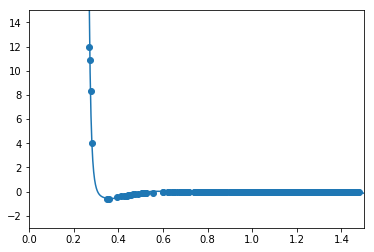

In [4]:
#
# Gaussian Process - for Coarse-Grain Potential Development
# Berkeley National Lab, Summer 2018
# University of Saint Mary
#

import numpy as np
from matplotlib import pyplot as plt
import GPy
from IPython.display import display

d = 1 # input dimension
var = 1 # variance
theta = 5 # lengthscale

InFileName = 'BiomolecularData.dat'
f = open(InFileName, 'r')
N = len(f.readlines())  # number of observed points.
f.close()

X = np.zeros(shape=(N,1))
Yo = np.zeros(shape=(N,1))

#------------------------------------
# Open the file and read data points from the file

InFile = open(InFileName, 'r')
LineNumber = 0
for Line in InFile:
    #Remove the lin-ending characters
    Line = Line.strip('\n')
    row = Line.split()
    #Index the counter used to keep track of line number
    X[LineNumber] = float(row[0])
    Yo[LineNumber] = float(row[1])
    LineNumber += 1
#After the loop is completed., close the file
InFile.close()
# -----------------------------------

X_min = np.ndarray.min(X)
Yo_min = np.ndarray.min(Yo) * 1.2  # Make 20% larger on the min value
Y = np.log(Yo - Yo_min)

# plt.scatter(X, Y)
# plt.axis([0, 1.5, -2, 15])

kernel = GPy.kern.RBF(d, var, theta)

# Original
#m = GPy.models.GPRegression(X,Y,kernel)
#
# Zach modefication:
m = GPy.models.SparseGPRegression(X,Y,kernel)


#fig = m.plot()
#GPy.plotting.show(fig, filename='basic_gp_regression_notebook')
#display(m)

m.optimize(messages=True)
m.optimize_restarts(num_restarts = 20)

#fig = m.plot()
#GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')
#display(m)

#fig = m.plot(plot_density=True)
#GPy.plotting.show(fig, filename='basic_gp_regression_density_notebook_optimized')
display(m)

m.predict(m.X)

#Xp = np.arange(X_min,2.5,0.002).reshape(-1,1)
Xp = np.arange(0,2.5,0.002).reshape(-1,1)
Yt = m.predict(Xp)
Yp = np.exp(Yt) + (Yo_min)

plt.axis([0, 1.5, -3, 15])
plt.scatter(X,Yo)
plt.plot(Xp,Yp[0])
plt.show()

Dataout = np.column_stack((Xp,Yp[0]))
np.savetxt('CGPotential.dat',(Dataout),fmt=('%10.5f', '%12.6f'))